In [16]:
import pickle
print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30


Automatically created module for IPython interactive environment


In [18]:
y.shape

(1083,)

In [1]:


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

Automatically created module for IPython interactive environment
Computing t-SNE embedding


<Figure size 640x480 with 1 Axes>

In [3]:
plt.show()

In [3]:
root_path = "../"
path_model = root_path + 'models/test'
features_path = root_path + 'data/features/data_tfid_hash28_n1000_SVD2.p'
#features_path = root_path + 'data/features/data_tfid_hash28_n10000_bigram_svd1000.p'
#features_path = root_path + 'data/features/data_tfid_hash28_n1000.p'



In [4]:
X ,y1 ,y2 , y3 = pickle.load( open( features_path, "rb" ) )


In [5]:
import numpy as np


train_fraction = 0.9


np.random.seed(42)
train_indices = np.random.choice(X.shape[0], round(train_fraction*X.shape[0]), replace=False)
test_indices = np.array(list(set(range(X.shape[0])) - set(train_indices)))

X_train = X[train_indices]
y_train = y1[train_indices]
X_test = X[test_indices]
y_test = y1[test_indices]

array([[ 3.62891986e-01, -3.13529806e-02, -1.19131930e-01, ...,
         1.50376253e-02, -1.08067209e-02, -2.72091422e-02],
       [ 3.09107528e-01,  7.98015766e-02, -6.10916714e-02, ...,
         3.74193583e-03, -1.83737082e-03,  1.33029270e-02],
       [ 2.33801852e-01, -3.10225267e-02,  1.91542028e-01, ...,
        -1.39839033e-03, -1.40091803e-02, -1.84358400e-04],
       ...,
       [ 2.25238984e-01,  1.86358658e-01,  3.35383769e-02, ...,
         6.71050713e-04,  1.83993749e-02, -2.43658763e-03],
       [ 2.54818226e-01, -1.17976038e-01, -1.58487490e-01, ...,
         2.52696627e-02, -1.42730497e-02, -2.34569930e-02],
       [ 1.99254602e-01, -5.15795165e-02,  1.70620085e-02, ...,
        -6.02856123e-03,  6.41096261e-04, -4.38954781e-03]])

In [6]:
print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

Automatically created module for IPython interactive environment


In [ ]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X_test)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

Computing t-SNE embedding


In [26]:

plot_embedding(tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (234))

plt.show()

TypeError: unsupported operand type(s) for -: 'MulticoreTSNE' and 'MulticoreTSNE'

In [81]:
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne = TSNE(n_components = 2)

RuntimeError: Cannot find/open tsne_multicore shared library

In [78]:
from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_jobs=40,
            n_components = 2,
            perplexity=60,
            early_exaggeration = 25.0, # early_exaggeration : float, optional (default: 12.0)
            n_iter = 1000, #1000
            learning_rate=350.0
           )
#Y = tsne.fit_transform(X_test)

RuntimeError: Cannot find/open tsne_multicore shared library

In [25]:
print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

X = X_test
y = y_test_new
n_samples, n_features = X.shape
n_neighbors = 30

#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Automatically created module for IPython interactive environment


In [22]:
y_test.shape

labels = set(y_test)

y_train_new = []
for yTmp in y_train:
    for idx, label in enumerate(labels):
        if yTmp==label: 
            y_train_new.append(idx)
            
y_test_new = []
for yTmp in y_test:
    for idx, label in enumerate(labels):
        if yTmp==label: 
            y_test_new.append(idx)      

In [23]:
y_test_new

[2,
 5,
 5,
 5,
 5,
 5,
 3,
 5,
 2,
 5,
 5,
 5,
 3,
 4,
 2,
 2,
 2,
 4,
 5,
 5,
 2,
 4,
 3,
 7,
 7,
 3,
 3,
 7,
 5,
 5,
 3,
 3,
 7,
 5,
 5,
 2,
 2,
 5,
 3,
 3,
 2,
 3,
 3,
 4,
 7,
 3,
 5,
 5,
 3,
 2,
 5,
 3,
 5,
 5,
 3,
 5,
 3,
 2,
 5,
 3,
 5,
 3,
 2,
 3,
 5,
 5,
 4,
 7,
 0,
 0,
 5,
 5,
 5,
 7,
 3,
 0,
 7,
 5,
 5,
 7,
 3,
 3,
 4,
 3,
 5,
 7,
 7,
 3,
 5,
 5,
 7,
 2,
 7,
 3,
 3,
 5,
 5,
 5,
 2,
 5,
 5,
 3,
 6,
 6,
 0,
 5,
 2,
 7,
 0,
 2,
 5,
 2,
 0,
 7,
 3,
 3,
 3,
 5,
 6,
 7,
 3,
 1,
 5,
 2,
 5,
 2,
 3,
 3,
 7,
 2,
 3,
 2,
 7,
 2,
 3,
 7,
 3,
 3,
 3,
 4,
 5,
 3,
 7,
 5,
 7,
 5,
 2,
 0,
 7,
 2,
 4,
 2,
 7,
 0,
 4,
 2,
 2,
 6,
 5,
 5,
 3,
 7,
 2,
 3,
 5,
 3,
 7,
 3,
 3,
 4,
 2,
 2,
 3,
 3,
 7,
 3,
 5,
 5,
 7,
 3,
 5,
 5,
 3,
 5,
 2,
 3,
 3,
 3,
 2,
 7,
 3,
 5,
 2,
 2,
 3,
 5,
 5,
 3,
 5,
 0,
 5,
 5,
 2,
 3,
 3,
 2,
 7,
 5,
 5,
 7,
 6,
 5,
 5,
 7,
 5,
 3,
 3,
 5,
 5,
 4,
 5,
 6,
 2,
 5,
 5,
 5,
 5,
 3,
 5,
 2,
 2,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 3,
 0,
 4,
 3,
 3,
 5,
 5,
 7,
 4,


In [36]:
labels

{'cultura',
 'deportes',
 'economia',
 'entretencion',
 'mundo',
 'pais',
 'sociedad',
 'tecnologia'}

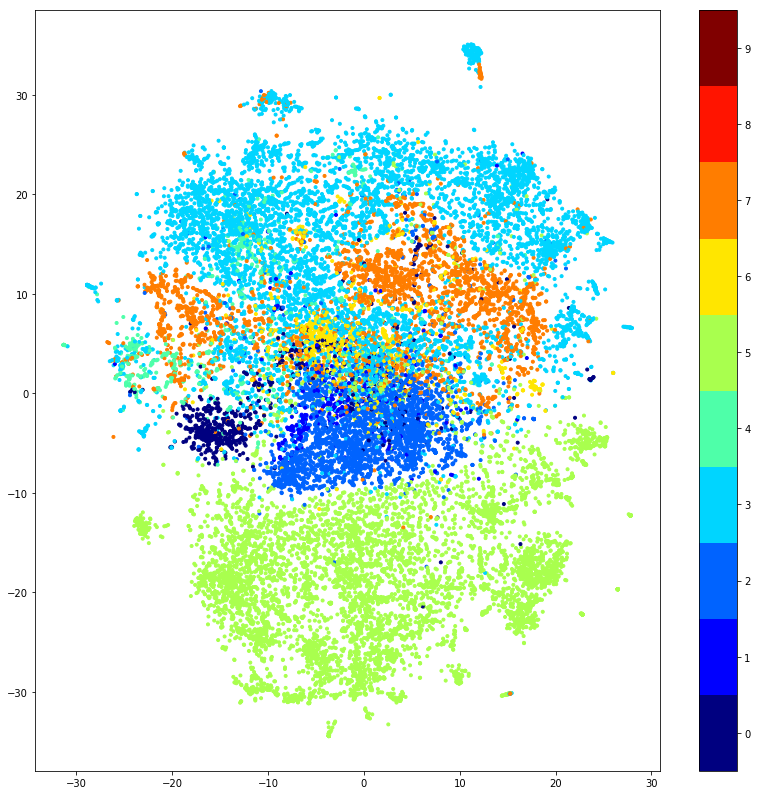

In [43]:
vis_x = Y[:, 0]
vis_y = Y[:, 1]
plt.scatter(vis_x, vis_y, c=y_test_new, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

plt.rcParams["figure.figsize"] = (120, 120)
plt.show()

{0'cultura',
 1'deportes',
 2'economia',
 3'entretencion',
 4'mundo',
 5'pais',
 6'sociedad',
 7'tecnologia'}

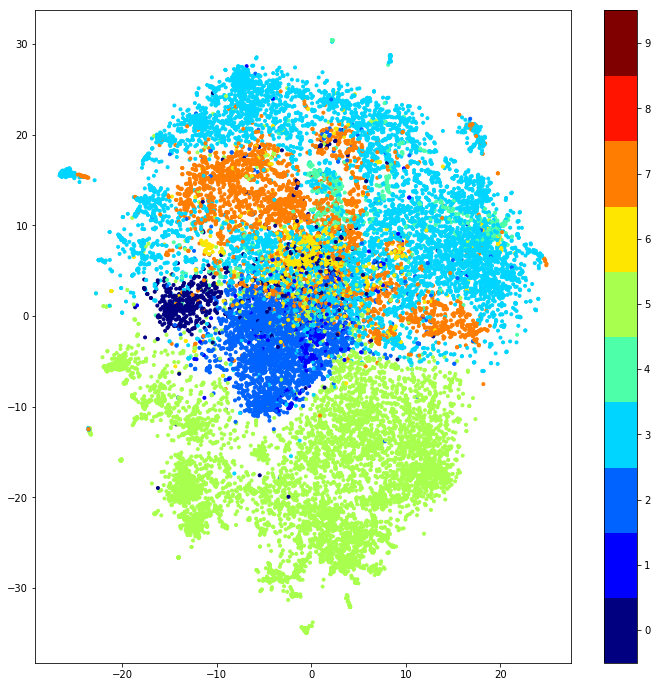

In [50]:
vis_x = Y[:, 0]
vis_y = Y[:, 1]
plt.scatter(vis_x, vis_y, c=y_test_new, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

#plt.rcParams["figure.figsize"] = (12, 12)
plt.show()

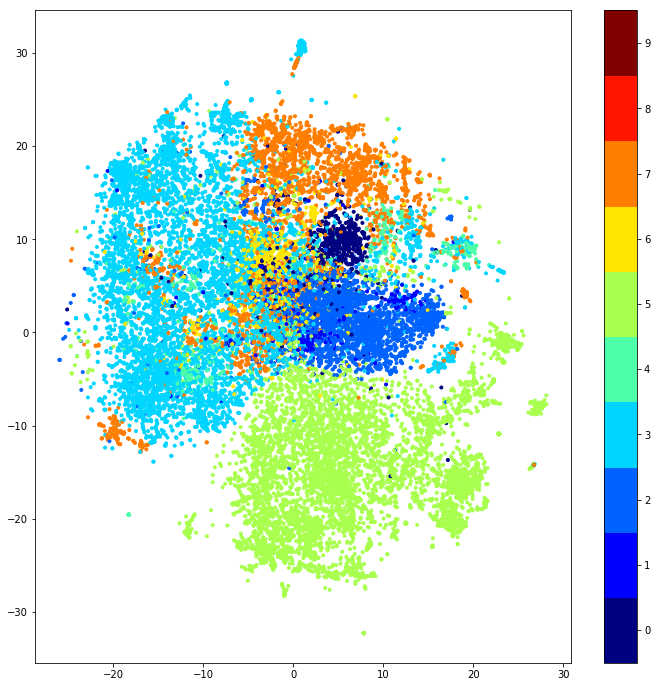

In [52]:
vis_x = Y[:, 0]
vis_y = Y[:, 1]
plt.scatter(vis_x, vis_y, c=y_test_new, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

#plt.rcParams["figure.figsize"] = (12, 12)
plt.show()

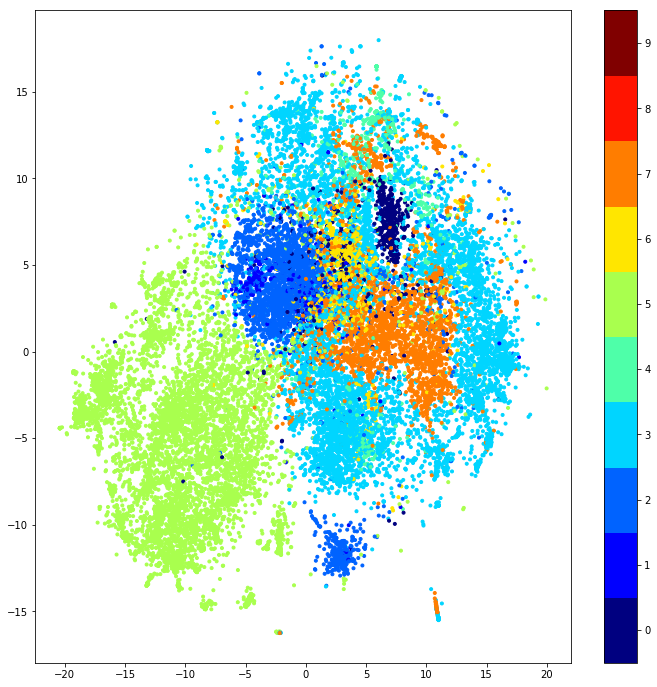

In [54]:
vis_x = Y[:, 0]
vis_y = Y[:, 1]
plt.scatter(vis_x, vis_y, c=y_test_new, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

#plt.rcParams["figure.figsize"] = (12, 12)
plt.show()

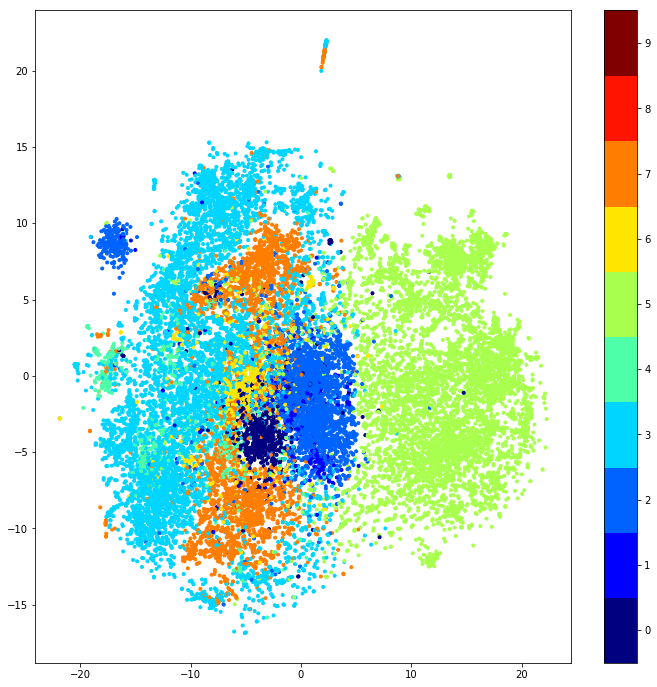

In [56]:
vis_x = Y[:, 0]
vis_y = Y[:, 1]
plt.scatter(vis_x, vis_y, c=y_test_new, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

plt.rcParams["figure.figsize"] = (120, 120)
plt.show()

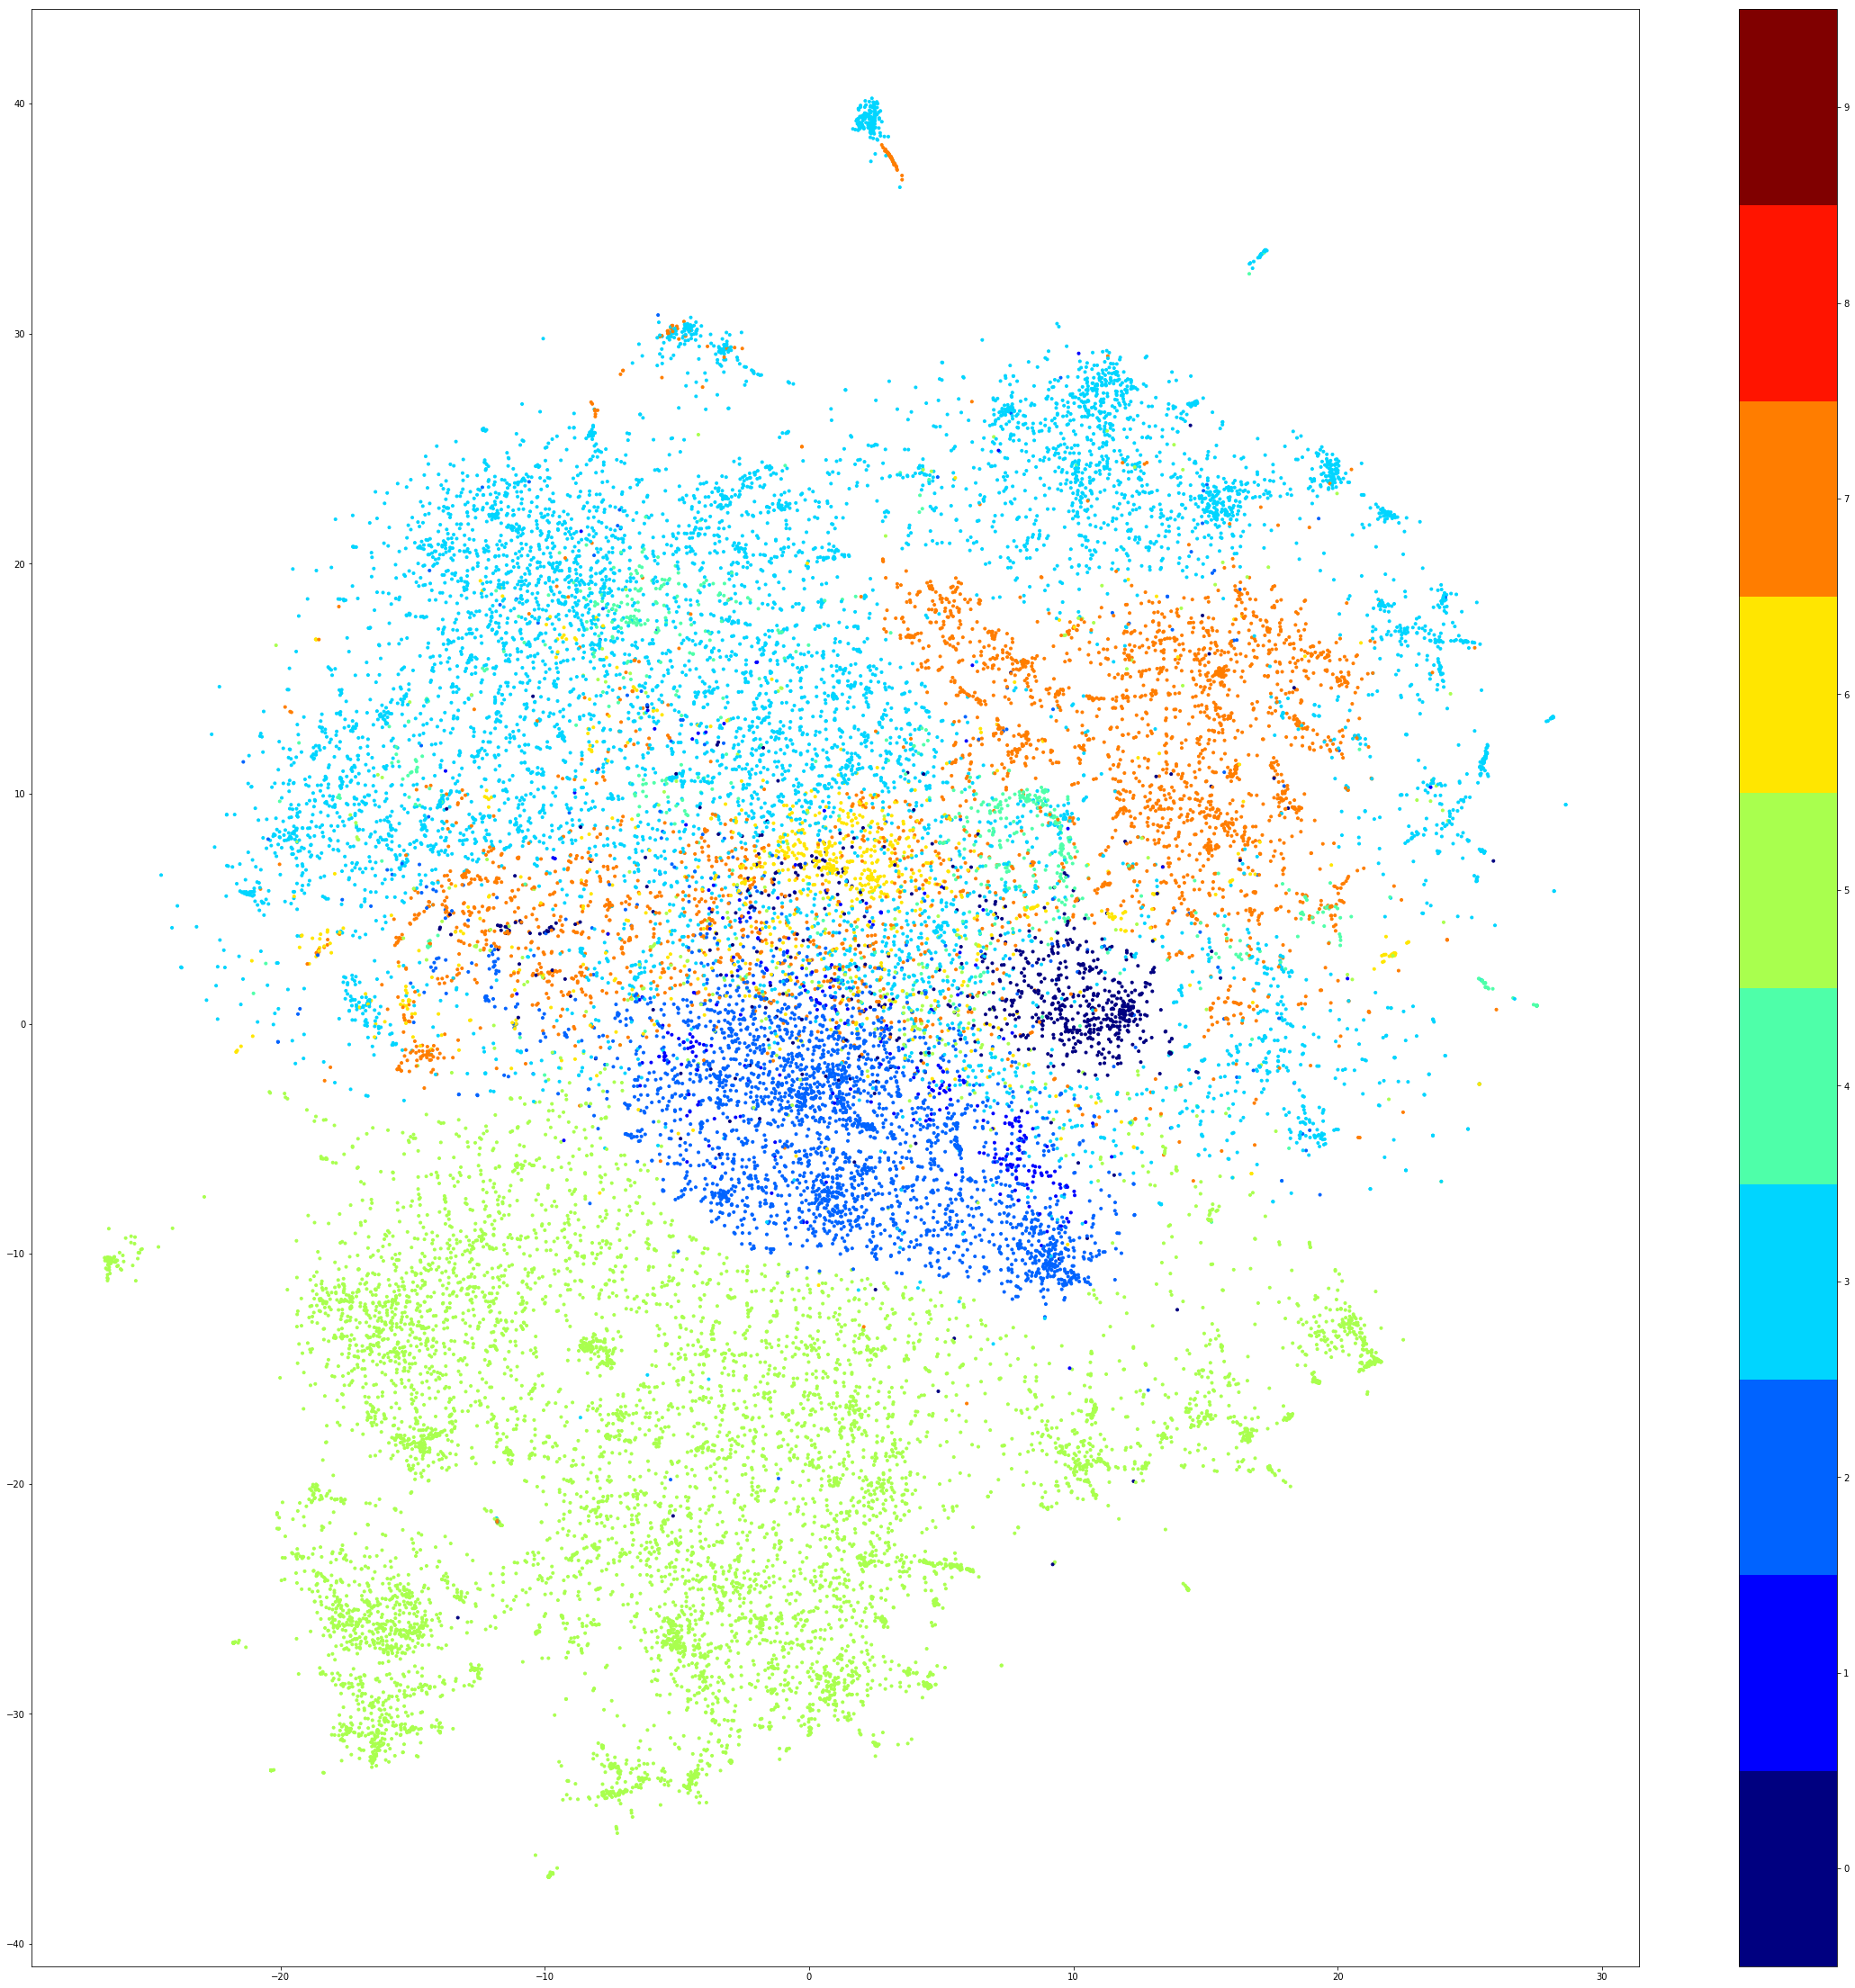

In [75]:
vis_x = Y[:, 0]
vis_y = Y[:, 1]
plt.scatter(vis_x, vis_y, c=y_test_new, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.rcParams["figure.figsize"] = (12, 12)
plt.show()

In [44]:
help(TSNE)vis_x = Y[:, 0]
vis_y = Y[:, 1]
plt.scatter(vis_x, vis_y, c=y_test_new, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

plt.rcParams["figure.figsize"] = (120, 120)
plt.show()

Help on class MulticoreTSNE in module MulticoreTSNE:

class MulticoreTSNE(builtins.object)
 |  Compute t-SNE embedding using Barnes-Hut optimization and
 |  multiple cores (if avaialble).
 |  
 |  Parameters mostly correspond to parameters of `sklearn.manifold.TSNE`.
 |  
 |  The following parameters are unused:
 |  * n_iter_without_progress
 |  * min_grad_norm
 |  * metric
 |  * method
 |  
 |  Parameter `init` doesn't support 'pca' initialization, but a precomputed
 |  array can be passed.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, n_components=2, perplexity=30.0, early_exaggeration=12, learning_rate=200, n_iter=1000, n_iter_without_progress=30, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0, random_state=None, method='barnes_hut', angle=0.5, n_jobs=1)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  fit(self, X, y=None)
 |  
 |  fit_transform(self, X, _y=None)
 |  
 |  -----------------------------------------------------

In [46]:
import sklearn
help(sklearn.manifold.TSNE)

Help on class TSNE in module sklearn.manifold.t_sne:

class TSNE(sklearn.base.BaseEstimator)
 |  t-distributed Stochastic Neighbor Embedding.
 |  
 |  t-SNE [1] is a tool to visualize high-dimensional data. It converts
 |  similarities between data points to joint probabilities and tries
 |  to minimize the Kullback-Leibler divergence between the joint
 |  probabilities of the low-dimensional embedding and the
 |  high-dimensional data. t-SNE has a cost function that is not convex,
 |  i.e. with different initializations we can get different results.
 |  
 |  It is highly recommended to use another dimensionality reduction
 |  method (e.g. PCA for dense data or TruncatedSVD for sparse data)
 |  to reduce the number of dimensions to a reasonable amount (e.g. 50)
 |  if the number of features is very high. This will suppress some
 |  noise and speed up the computation of pairwise distances between
 |  samples. For more tips see Laurens van der Maaten's FAQ [2].
 |  
 |  Read more in the 